In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#since I may get warnings, I can do the following
import warnings
warnings.filterwarnings("ignore")

In [44]:
#to load csv
df = pd.read_csv('dataset.csv')
len(df)

48895

In [45]:
#look at first rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [46]:
#the homework says to use only a few columns
usecols = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

data = pd.read_csv('dataset.csv', usecols=usecols)

In [47]:
data.head(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129
6,40.68688,-73.95596,60,45,49,0.40,1,0
7,40.76489,-73.98493,79,2,430,3.47,1,220
8,40.80178,-73.96723,79,2,118,0.99,1,0
9,40.71344,-73.99037,150,1,160,1.33,4,188


In [48]:
#take a look at how the data is coming in. Are there 
#correctly labeled float64  - values that have decimals?
#correctly labeled int64 - integers with no decimals?
#if needed objects which are categorical data?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


In [49]:
#I learned the hardway to use the Kaggle csv file and not the notebook one because it 
#is a different file.

<AxesSubplot:xlabel='price', ylabel='Density'>

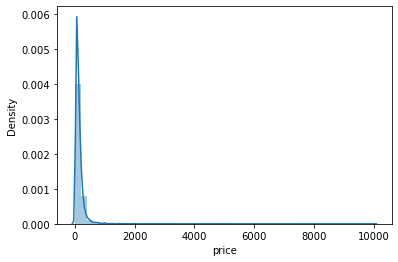

In [64]:
#to see if the column 'price' has a long tail, which it does
sns.distplot(data.price)

# Generic linear regression code

In [68]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Looking for missing data

In [50]:
#let's look to see if there is any missing data... nan
#first check to see how many rows we have

print(data.shape)

(48895, 8)


In [51]:
#then compare this info to the number of rows = 48895
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


In [53]:
# Alexey didn't teach us this. But I can see how it works
# because only reviews_per_month is not equal to 48895

# how many missing values? 48895 - 38843 = 10,052

In [55]:
#this is what Alexey taught
#df_train[base].isnull().sum()
#and to fill the missing values with 0 you use
#df_train[base].fillna(0).isnull().sum()

#but for these columns only we use
data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Descriptive statistics

In [56]:
#to get the descriptive statistics for one row
df.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [57]:
#you can also do these for the 8 rows

data.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.49979,40.66799,40.69010,40.72307,40.763115,40.80489,40.825643,40.864661,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-74.24442,-73.99669,-73.98307,-73.95568,-73.936275,-73.90781,-73.865771,-73.776920,-73.71299
price,48895.0,152.720687,240.154170,0.00000,0.00000,49.00000,69.00000,106.00000,175.000000,269.00000,355.000000,799.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,1.00000,1.00000,3.00000,5.000000,28.00000,30.000000,45.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,0.00000,0.00000,1.00000,5.00000,24.000000,70.00000,114.000000,214.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.01000,0.06000,0.19000,0.72000,2.020000,3.63000,4.640000,7.195800,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,1.00000,1.00000,2.000000,5.00000,15.000000,232.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,0.00000,0.00000,45.00000,227.000000,337.00000,359.000000,365.000000,365.00000


# Shuffle and splitting into 3 (train, val, test)

In [59]:
#to shuffle the dataset and use a seed of 42
#and split it into three subsamples/three datasets
#train = 60%, validate = 20%, test = 20%
n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]

In [60]:
#per the homework, delete the price column and apply a log
#but the solution shows you do the log first and
#then delete the columns
#so first I'm going to apply the log

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [61]:
#then I'm going to reset the index column
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [62]:
#then I'm going to train  --- I have to admit I don't understand this section!
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [63]:
#and then drop the price column
del df_train['price']
del df_val['price']
del df_test['price']

# Dealing with missing data by filling imputed mean values

In [65]:
check = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
#prepare data
def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [66]:
#RMSE test function
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [69]:
mean = df_train.reviews_per_month.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [70]:
X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [71]:
np.round(rmse(y_val, y_mean_pred_val),2)

0.64

# Dealing with the missing data by filling in with a 0

In [72]:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [73]:
X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [74]:
np.round(rmse(y_val, y_null_pred_val),2)

0.64

# Regularization

In [75]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [77]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, 'rmse=', rmse_val)

0 -419.9126568379371 rmse= 0.64
1e-06 -419.8627139965529 rmse= 0.64
0.0001 -414.97649066284794 rmse= 0.64
0.001 -375.27365106024087 rmse= 0.64
0.01 -191.78384011508243 rmse= 0.66
0.1 -32.562560530502736 rmse= 0.68
1 -3.499216833056674 rmse= 0.68
5 -0.7033623169370193 rmse= 0.68
10 -0.3512767576462211 rmse= 0.68


# All together now!
# Shuffle, split, apply logs, drop price columns
# Fill missing values with 0ss
# Check for different seeds and evaluate the model on the validation datasets
# and compare rmse values

In [78]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = data.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.price.values
    y_val_orig = df_val.price.values
    y_test_orig = df_test.price.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

0 -427.62844825504976 0.65
1 -414.7055510375614 0.65
2 -423.2541335395113 0.65
3 -421.89331771985144 0.64
4 -422.0609925315971 0.64
5 -429.1787539444051 0.63
6 -427.49189672641694 0.63
7 -428.18847116285554 0.65
8 -427.69290973866566 0.65
9 -426.98268594460393 0.64


In [79]:
rmse_list

[0.65, 0.65, 0.65, 0.64, 0.64, 0.63, 0.63, 0.65, 0.65, 0.64]

# Compute the standard deviation and round
# it to 2 decimal points
# We're hoping the score is low b/c the model is stable

In [80]:
np.round(np.std(rmse_list),3)

0.008

# Use seed 9 and split dataset like before

In [83]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

    #we want to combine train and val df's to get a full training dataframe
df_full_train= pd.concat([df_train, df_val])
    
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_full_train_orig = df_full_train.price.values
y_test_orig = df_test.price.values

y_full_train = np.log1p(y_full_train_orig)
y_test = np.log1p(y_test_orig)
 
    #and again drop the price columns
del df_train['price']
del df_test['price']

# Filling the missing values with 0 and using
# an r= 0.001

In [86]:
X_null_train_val = prepare_X(df_full_train, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_full_train, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.65